In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import nltk
from nltk.corpus import words,stopwords
from nltk.tokenize import sent_tokenize,word_tokenize,WordPunctTokenizer 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# I. Market Data

In [40]:
df_market = pd.read_csv('../analysis/data/GOOG_market.csv')
df_market.head()

,date,close,volume,open,high,low
0,2019/07/26,1250.41,4805752.0,1224.04,1265.5499,1224.00
1,2019/07/25,1132.12,2209823.0,1137.82,1141.7000,1120.92
2,2019/07/24,1137.81,1590101.0,1131.90,1144.0000,1126.99
3,2019/07/23,1146.21,1093688.0,1144.00,1146.9000,1131.80
4,2019/07/22,1138.07,1301846.0,1133.45,1139.2500,1124.24


In [41]:
df_market.shape

(756, 6)

In [42]:
df_market.date = pd.to_datetime(df_market['date'], format='%Y/%m/%d')

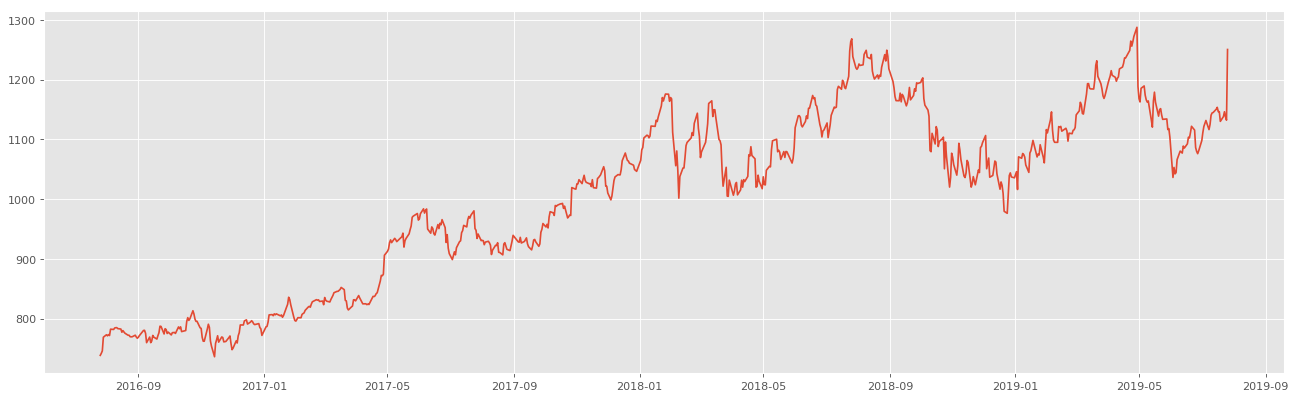

In [43]:
plt.figure(figsize=(20,6), dpi=80)
plt.plot(df_market['date'],df_market['close'])

# II. News Data

## 1.Load data

In [2]:
df_news = pd.read_csv('../analysis/data/train_GOOG_1000d.csv', header=None)

In [3]:
df_news.head()

,0,1,2,3,4,5
0,GOOG,Alphabet Inc,20190724,Google goes Nigerian with local accent 'infor...,LAGOS July 24 Commuters making their way thro...,normal
1,GOOG,Alphabet Inc,20190724,Mnuchin says Google's work with China does not...,WASHINGTON Google's work with the Chinese gove...,normal
2,GOOG,Alphabet Inc,20190724,Big Tech faces broad U.S. Justice Department a...,WASHINGTON The U.S. Justice Department said on...,normal
3,GOOG,Alphabet Inc,20190722,US STOCKS-S&P 500 climbs toward record high e...,* Indexes: Dow +0.07% S&P 500 +0.28% Nasdaq ...,normal
4,GOOG,Alphabet Inc,20190722,US STOCKS-S&P 500 climbs toward record marque...,* Indexes: Dow +0.01% S&P 500 +0.28% Nasdaq ...,normal


In [4]:
df_news.shape

(784, 6)

In [5]:
cols_name = ['ticker','company','date','title','content','type']
df_news.columns = cols_name

In [6]:
df_news.head()

,ticker,company,date,title,content,type
0,GOOG,Alphabet Inc,20190724,Google goes Nigerian with local accent 'infor...,LAGOS July 24 Commuters making their way thro...,normal
1,GOOG,Alphabet Inc,20190724,Mnuchin says Google's work with China does not...,WASHINGTON Google's work with the Chinese gove...,normal
2,GOOG,Alphabet Inc,20190724,Big Tech faces broad U.S. Justice Department a...,WASHINGTON The U.S. Justice Department said on...,normal
3,GOOG,Alphabet Inc,20190722,US STOCKS-S&P 500 climbs toward record high e...,* Indexes: Dow +0.07% S&P 500 +0.28% Nasdaq ...,normal
4,GOOG,Alphabet Inc,20190722,US STOCKS-S&P 500 climbs toward record marque...,* Indexes: Dow +0.01% S&P 500 +0.28% Nasdaq ...,normal


## 2. Data preprocessing and Visualisation

In [7]:
def num_to_date(num):
    text = str(num)
    date = datetime.strptime(text, '%Y%m%d')
    return date

df_news['date'] = df_news['date'].apply(lambda row: num_to_date(row))

In [8]:
df_news['date'].head()

0   2019-07-24
1   2019-07-24
2   2019-07-24
3   2019-07-22
4   2019-07-22
Name: date, dtype: datetime64[ns]

In [9]:
len(df_news['date'].unique())

310

### 2.1 Build a new stopwords list

In [10]:
auditor_sw = []
with open('data/wordlist/StopWords_Auditor.txt','r') as fa:
    lines = fa.readlines()
    for line in lines:
        auditor_sw.append(line.strip())

In [11]:
datesAndNum_sw = []
with open('data/wordlist/StopWords_DatesandNumbers.txt','r') as fdn:
    lines = fdn.readlines()
    for line in lines:
        datesAndNum_sw.append(line.strip())

In [12]:
generic_sw = []
with open('data/wordlist/StopWords_Generic.txt','r') as fg:
    lines = fg.readlines()
    for line in lines:
        generic_sw.append(line.strip())

In [13]:
glong_sw = []
with open('data/wordlist/StopWords_GenericLong.txt','r') as fgl:
    lines = fgl.readlines()
    for line in lines:
        glong_sw.append(line.strip())

In [14]:
geographic_sw = []
with open('data/wordlist/StopWords_Geographic.txt','r') as fgeo:
    lines = fgeo.readlines()
    for line in lines:
        geographic_sw.append(line.strip())

In [15]:
new_stopwords = auditor_sw + datesAndNum_sw + generic_sw + glong_sw + geographic_sw

### 2.2 Clean the news data

In [16]:
def datacleaner(text):
    stemmer = PorterStemmer()
#     lemmatizer = WordNetLemmatizer()
    wps = WordPunctTokenizer().tokenize(text)
    wps = [w for w in wps if w not in stopwords.words('english')] # remove buit-in stopwords
    wps = [w for w in wps if w not in new_stopwords] # remove 
    words = [w.lower() for w in wps if w.isalpha()] # lower case and remove punctuation
#     words = [lemmatizer.lemmatize(w, pos='n') for w in words] # Lemmatisation
    words = [stemmer.stem(w) for w in words] # Normalisation,Stemming
    
    return words

In [17]:
df_news['content'] = df_news['content'].apply(lambda row: datacleaner(row))

In [18]:
df_news['content'].head(20)

0     [lago, juli, commut, make, nigeria, hear, trav...
1     [googl, work, chines, govern, rais, concern, u...
2     [the, u, s, justic, depart, tuesday, open, bro...
3              [index, dow, s, p, nasdaq, updat, close]
4          [index, dow, s, p, nasdaq, updat, afternoon]
5     [new, york, juli, ban, pornographi, tumblr, ne...
6     [australia, lendleas, group, thursday, secur, ...
7     [abbott, laboratori, plan, ramp, manufactur, c...
8     [juli, abbott, laboratori, plan, ramp, manufac...
9     [indonesia, draft, rule, impos, ad, tax, onlin...
10    [juli, indonesia, draft, rule, impos, ad, tax,...
11    [juli, alphabet, inc, googl, llc, hit, monday,...
12    [execut, amazon, inc, appl, inc, facebook, inc...
13    [juli, execut, amazon, inc, appl, inc, faceboo...
14    [alphabet, inc, googl, friday, announc, subsea...
15    [june, alphabet, inc, googl, friday, announc, ...
16    [francisco, alphabet, inc, announc, thursday, ...
17    [francisco, june, alphabet, inc, announc, 

In [19]:
df_news['title'] = df_news['title'].apply(lambda row: datacleaner(row))

In [20]:
df_news['title'].head(20)

0     [googl, nigerian, local, accent, inform, trans...
1          [mnuchin, googl, work, china, rais, concern]
2     [big, tech, face, broad, u, s, justic, depart,...
3     [us, stock, s, p, climb, record, high, earn, f...
4     [us, stock, s, p, climb, record, marque, repor...
5     [focu, verizon, resurrect, media, busi, safe, ...
6     [australian, develop, lendleas, land, billion,...
7     [abbott, hike, product, lower, cost, glucos, m...
8     [focu, abbott, hike, product, lower, cost, glu...
9     [indonesia, draft, rule, appli, vat, onlin, pr...
10    [indonesia, draft, rule, appli, vat, onlin, pr...
11    [googl, accus, rip, digit, ad, technolog, u, s...
12    [big, tech, execut, due, capitol, hill, week, ...
13    [big, tech, exec, head, capitol, hill, antitru...
14    [googl, announc, subsea, cabl, equiano, connec...
15    [googl, announc, subsea, cabl, equiano, connec...
16    [googl, cloud, absorb, alphabet, cybersecur, f...
17    [googl, cloud, absorb, alphabet, cybersecu

### 2.3 Concatenate the title and content into one document

In [21]:
# 合并title and content
df_news['text'] = df_news['title'] + df_news['content']
df_news['text'].head(20)

0     [googl, nigerian, local, accent, inform, trans...
1     [mnuchin, googl, work, china, rais, concern, g...
2     [big, tech, face, broad, u, s, justic, depart,...
3     [us, stock, s, p, climb, record, high, earn, f...
4     [us, stock, s, p, climb, record, marque, repor...
5     [focu, verizon, resurrect, media, busi, safe, ...
6     [australian, develop, lendleas, land, billion,...
7     [abbott, hike, product, lower, cost, glucos, m...
8     [focu, abbott, hike, product, lower, cost, glu...
9     [indonesia, draft, rule, appli, vat, onlin, pr...
10    [indonesia, draft, rule, appli, vat, onlin, pr...
11    [googl, accus, rip, digit, ad, technolog, u, s...
12    [big, tech, execut, due, capitol, hill, week, ...
13    [big, tech, exec, head, capitol, hill, antitru...
14    [googl, announc, subsea, cabl, equiano, connec...
15    [googl, announc, subsea, cabl, equiano, connec...
16    [googl, cloud, absorb, alphabet, cybersecur, f...
17    [googl, cloud, absorb, alphabet, cybersecu

### 2.4 Visualize the frequency of the words

In [22]:
text_wl = []
for index,row in df_news.iterrows():
    for word in row['text']:
        text_wl.append(word)

text_wl = list(set(text_wl))
whole_text = ' '.join(text_wl)

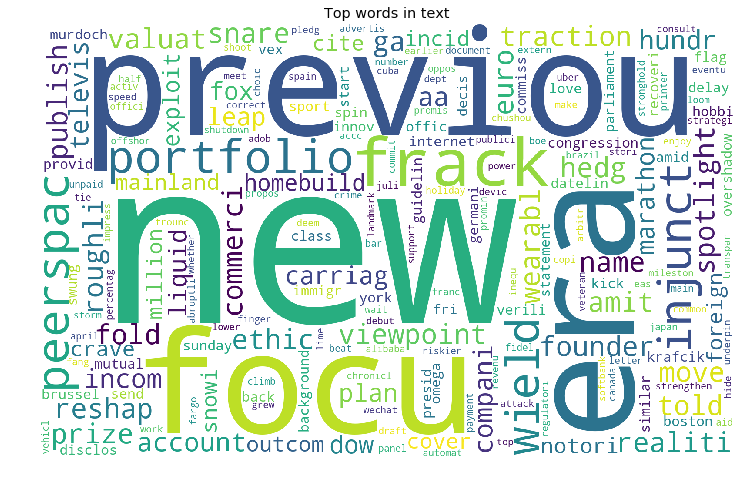

In [23]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',
              max_font_size=None,
              width=1600,
              height=1000)
wc.generate(whole_text)
plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.title('Top words in text')
plt.axis('off')
plt.show()

## 3. Build the polarity dictionary

### 3.1 Financial sentiment word list

In [24]:
financial_sheets = pd.read_excel('data/wordlist/LoughranMcDonald_SentimentWordLists_2018.xlsx', sheet_name=['Negative','Positive'])

In [25]:
financial_sheets['Negative'].head()

,ABANDON
0,ABANDONED
1,ABANDONING
2,ABANDONMENT
3,ABANDONMENTS
4,ABANDONS


In [26]:
stemmer = PorterStemmer()

In [27]:
path = 'data/wordlist/negative-words.txt'
general_neg = []
with open(path, 'r', encoding='ISO-8859-1') as f:
    ls = f.readlines()
    for word in ls:
        general_neg.append(word.strip())

In [28]:
print(general_neg[:20])

['abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly']


In [29]:
# 创建negative_words字典
neg_dict = financial_sheets['Negative'].values
neg_dict = neg_dict.reshape(1, len(neg_dict)).tolist()[0]
neg_dict = neg_dict + general_neg
neg_dict = list(map(lambda x:x.lower(),neg_dict))
neg_dict = list(set([stemmer.stem(w) for w in neg_dict]))
print(neg_dict[:20])

['insurrect', 'humili', 'warp', 'ineffici', 'outmod', 'corrupt', 'injunct', 'gruff', 'excess', 'babbl', 'salaci', 'breakdown', 'corruptli', 'hiliari', 'snare', 'diffid', 'disintegr', 'dodgey', 'overwhelmingli', 'incapacit']


In [30]:
path = 'data/wordlist/positive-words.txt'
general_pos = []
with open(path, 'r', encoding='ISO-8859-1') as f:
    ls = f.readlines()
    for word in ls:
        general_pos.append(word.strip())

In [31]:
# 创建positive_words字典
pos_dict = financial_sheets['Positive'].values
pos_dict = pos_dict.reshape(1, len(pos_dict)).tolist()[0]
pos_dict = pos_dict + general_pos
pos_dict = list(map(lambda x:x.lower(),pos_dict))
pos_dict = list(set([stemmer.stem(w) for w in pos_dict]))
print(pos_dict[:20])

['graciou', 'peach', 'traction', 'stylishli', 'allur', 'passion', 'first-class', 'ethic', 'prize', 'cheeri', 'smilingli', 'entranc', 'lavish', 'aford', 'breez', 'sustain', 'awestruck', 'spaciou', 'fancin', 'solicit']


In [32]:
def sentiment_score(word_list):
    poscount = 0 # 积极词的第一次分值
    negcount = 0
    for word in word_list:
        if word in pos_dict:
            poscount += 1
        elif word in neg_dict:
            negcount += 1
    sent_score = poscount - negcount
    return sent_score

In [33]:
# sentscore_ls = []
# for index,row in df_news.iterrows():
# #     print(row['title'],row['content'])
#     score = sentiment_score(row['text'])
#     sentscore_ls.append(score)

In [34]:
df_news['sent_score'] = df_news['text'].apply(lambda row: sentiment_score(row))

In [35]:
df_news.head(20)

,ticker,company,date,title,content,type,text,sent_score
0,GOOG,Alphabet Inc,2019-07-24,"[googl, nigerian, local, accent, inform, trans...","[lago, juli, commut, make, nigeria, hear, trav...",normal,"[googl, nigerian, local, accent, inform, trans...",2
1,GOOG,Alphabet Inc,2019-07-24,"[mnuchin, googl, work, china, rais, concern]","[googl, work, chines, govern, rais, concern, u...",normal,"[mnuchin, googl, work, china, rais, concern, g...",-1
2,GOOG,Alphabet Inc,2019-07-24,"[big, tech, face, broad, u, s, justic, depart,...","[the, u, s, justic, depart, tuesday, open, bro...",normal,"[big, tech, face, broad, u, s, justic, depart,...",0
3,GOOG,Alphabet Inc,2019-07-22,"[us, stock, s, p, climb, record, high, earn, f...","[index, dow, s, p, nasdaq, updat, close]",normal,"[us, stock, s, p, climb, record, high, earn, f...",-1
4,GOOG,Alphabet Inc,2019-07-22,"[us, stock, s, p, climb, record, marque, repor...","[index, dow, s, p, nasdaq, updat, afternoon]",normal,"[us, stock, s, p, climb, record, marque, repor...",0
5,GOOG,Alphabet Inc,2019-07-18,"[focu, verizon, resurrect, media, busi, safe, ...","[new, york, juli, ban, pornographi, tumblr, ne...",normal,"[focu, verizon, resurrect, media, busi, safe, ...",1
6,GOOG,Alphabet Inc,2019-07-18,"[australian, develop, lendleas, land, billion,...","[australia, lendleas, group, thursday, secur, ...",normal,"[australian, develop, lendleas, land, billion,...",1
7,GOOG,Alphabet Inc,2019-07-16,"[abbott, hike, product, lower, cost, glucos, m...","[abbott, laboratori, plan, ramp, manufactur, c...",normal,"[abbott, hike, product, lower, cost, glucos, m...",4
8,GOOG,Alphabet Inc,2019-07-16,"[focu, abbott, hike, product, lower, cost, glu...","[juli, abbott, laboratori, plan, ramp, manufac...",normal,"[focu, abbott, hike, product, lower, cost, glu...",4
9,GOOG,Alphabet Inc,2019-07-16,"[indonesia, draft, rule, appli, vat, onlin, pr...","[indonesia, draft, rule, impos, ad, tax, onlin...",normal,"[indonesia, draft, rule, appli, vat, onlin, pr...",1


In [36]:
news_by_date = df_news.groupby(['date'])[['sent_score']].sum()

In [37]:
news_by_date.head()

,sent_score
date,
2016-11-03,-7
2016-11-05,-2
2016-11-07,0
2016-11-10,-1
2016-11-14,2


/Users/suhang/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


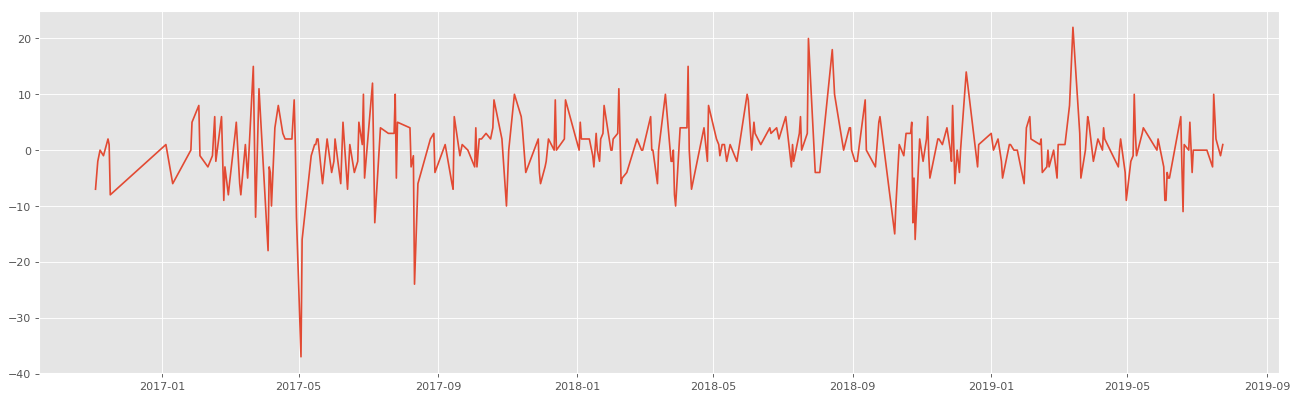

In [38]:
plt.figure(figsize=(20,6), dpi=80)
plt.plot(news_by_date.index, news_by_date.sent_score)